# Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin

%matplotlib inline

### 1.2. Comparison of the  `KMeans` and `MiniBatchKMeans`
-  http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py

In [2]:
## Generate sample data
np.random.seed(1234)
centers = [[1,1], [-1,-1], [1,-1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std = 0.7)

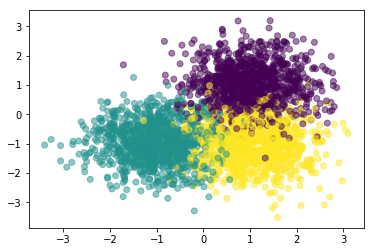

In [3]:
## Scatter plot
plt.scatter(X[:,0], X[:,1], c = labels_true, alpha = 0.5)

In [4]:
## Construct clusters with KMeans
k_means = KMeans(init='k-means++',
                 n_clusters=3,
                 n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [5]:
print(t_batch)

0.0441441535949707


In [6]:
## Construct clusters with MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++',
                      n_clusters=3,
                      batch_size=45,
                      n_init=10,
                      max_no_improvement=10,
                      verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

In [7]:
print(t_mini_batch)

0.021023988723754883


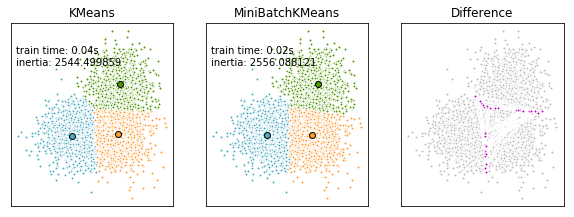

In [8]:
## Plot result
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## 참고 (in official website of `scikit-learn`)
- Comparing different clustering algorithms on toy datasets: [Link](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)
-  Empirical evaluation of the impact of k-means initialization: [Link](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html)